In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from tqdm import tqdm
import pyvo
import os
import sys

sys.path.append('../')
sys.path.append('../../')
import WD_models
#import interpolator as interp

from stark import utils, plotting

Text(0, 0.5, 'N')

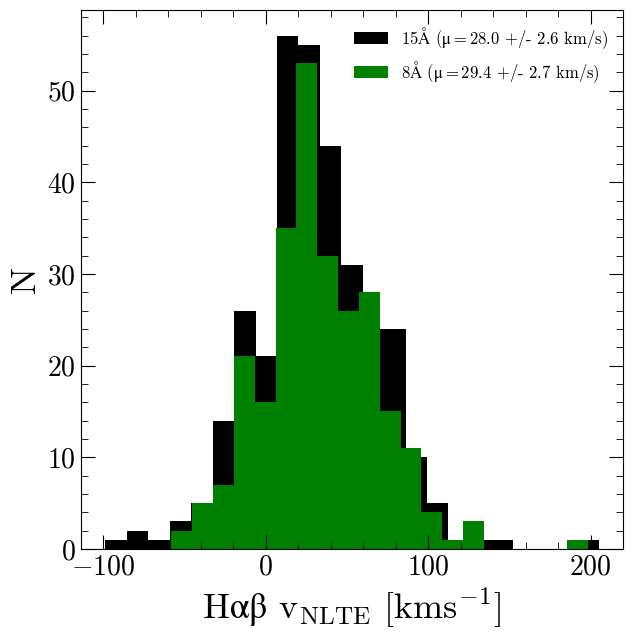

In [3]:
"""mean gravz for the Hab fits
"""
ab15 = utils.read_clean_nlte(coresize=15, lines='b')
ab8 = utils.read_clean_nlte(coresize=8, lines='b')

plt.hist(ab15.nlte_rv, label = f'$15\\AA$ ($\\mu = ${ab15.nlte_rv.median():2.1f} +/- {1.2533*ab15.nlte_rv.std()/np.sqrt(len(ab15)):2.1f} km/s)', color='k');
plt.hist(ab8.nlte_rv, label = f'$8\\AA$ ($\\mu = ${ab8.nlte_rv.median():2.1f} +/- {1.2533*ab8.nlte_rv.std()/np.sqrt(len(ab8)):2.1f} km/s)', color='green');
#plt.axvline(x = 32.57, label='Falcon+2010', c='blue', lw=3)
plt.legend(framealpha=0, fontsize=12)
plt.xlabel('H$\\alpha\\beta$ $v_\\text{NLTE}$ $[kms^{-1}]$')
plt.ylabel('N')

Text(0, 0.5, 'N')

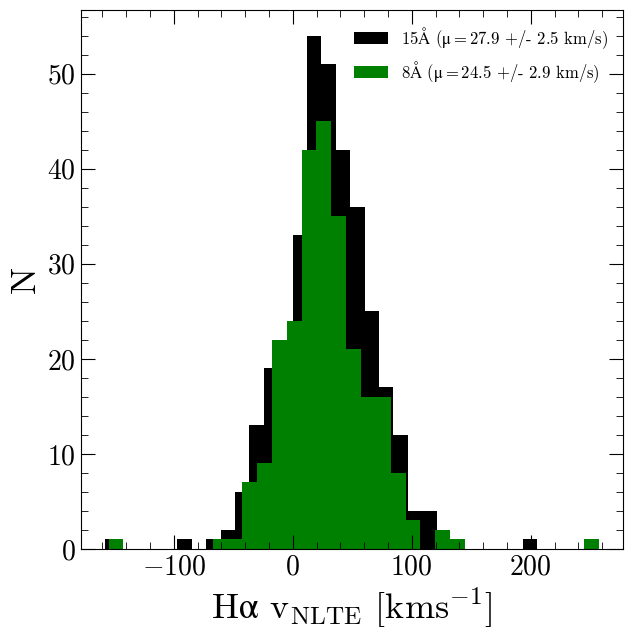

In [4]:
"""mean gravz for the Hab fits
"""
a15 = utils.read_clean_nlte(coresize=15, lines='ab')
a8 = utils.read_clean_nlte(coresize=8, lines='ab')

plt.hist(a15.nlte_rv, label = f'$15\\AA$ ($\\mu = ${a15.nlte_rv.median():2.1f} +/- {1.2533*a15.nlte_rv.std()/np.sqrt(len(a15)):2.1f} km/s)', color='k');
plt.hist(a8.nlte_rv, label = f'$8\\AA$ ($\\mu = ${a8.nlte_rv.median():2.1f} +/- {1.2533*a8.nlte_rv.std()/np.sqrt(len(a8)):2.1f} km/s)', color='green');
#plt.axvline(x = 32.57, label='Falcon+2010', c='blue', lw=3)
plt.legend(framealpha=0, fontsize=12)
plt.xlabel('H$\\alpha$ $v_\\text{NLTE}$ $[kms^{-1}]$')
plt.ylabel('N')

In [5]:
import astropy
import astropy.units as u

goodcoadds = pd.read_csv(utils.fetch_goodspypath())[['Name', 'SOURCE_ID']]
tap_service = pyvo.dal.TAPService("http://TAPVizieR.u-strasbg.fr/TAPVizieR/tap/")
QUERY = f"""select *
        from \"J/ApJ/712/585/WDs\"
        """
table = tap_service.search(QUERY).to_table().to_pandas()
table['Name'] = table['Name'].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else x)
table = pd.merge(pd.merge(table, goodcoadds, on="Name"), ab15, left_on="SOURCE_ID", right_on="source_id")

Text(0, 0.5, 'NLTE H$\\beta$ $15\\AA$ $[kms^{-1}]$')

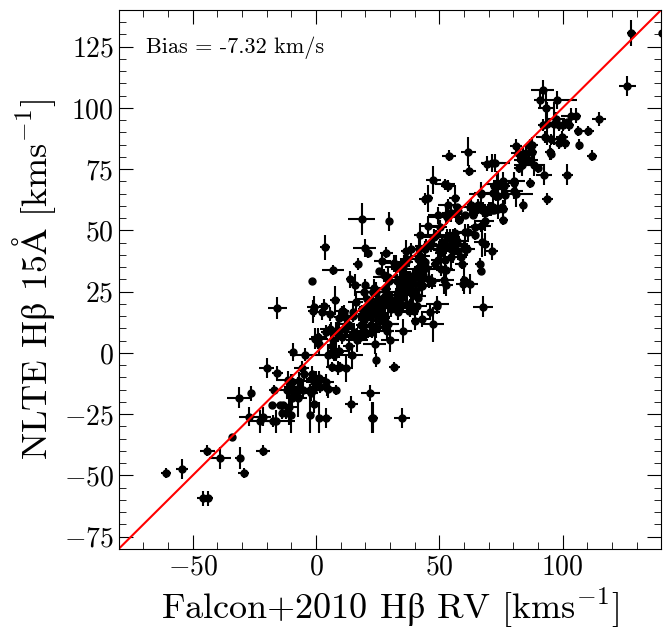

In [6]:
plt.errorbar(table['Hb-V'] - table['LSR-V'], table['nlte_rv'], xerr=table['e_Hb-V'], yerr=table['nlte_e_rv'], fmt='o', c = 'k', zorder=0)
xmin,xmax = -80, 140
plt.plot([xmin, xmax], [xmin,xmax],c='red')
plt.xlim(xmin,xmax)
plt.ylim(xmin,xmax)

plt.text(0.05, 0.95, f'Bias = {np.mean(table['nlte_rv'] - (table['Hb-V'] - table['LSR-V'])):2.2f} km/s', transform=plt.gca().transAxes,
                fontsize=16, verticalalignment='top')
plt.xlabel('Falcon+2010 H$\\beta$ RV $[kms^{-1}]$')
plt.ylabel('NLTE H$\\beta$ $15\\AA$ $[kms^{-1}]$')

In [8]:
goodcoadds = pd.read_csv(utils.fetch_goodspypath())[['Name', 'SOURCE_ID']]
tap_service = pyvo.dal.TAPService("http://TAPVizieR.u-strasbg.fr/TAPVizieR/tap/")
QUERY = f"""select *
        from \"J/ApJ/712/585/WDs\"
        """
table = tap_service.search(QUERY).to_table().to_pandas()
table['Name'] = table['Name'].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else x)

ab15_voit = pd.read_csv('../data/coadd/nlte/voigt_ab_15angstrom.csv').query("nlte_redchi < 5 & nlte_e_rv < 10")
table = pd.merge(pd.merge(table, goodcoadds, on="Name"), ab15_voit, left_on="SOURCE_ID", right_on="source_id")

Text(0, 0.5, 'Voigt NLTE H$\\alpha\\beta$ $15\\AA$ $[kms^{-1}]$')

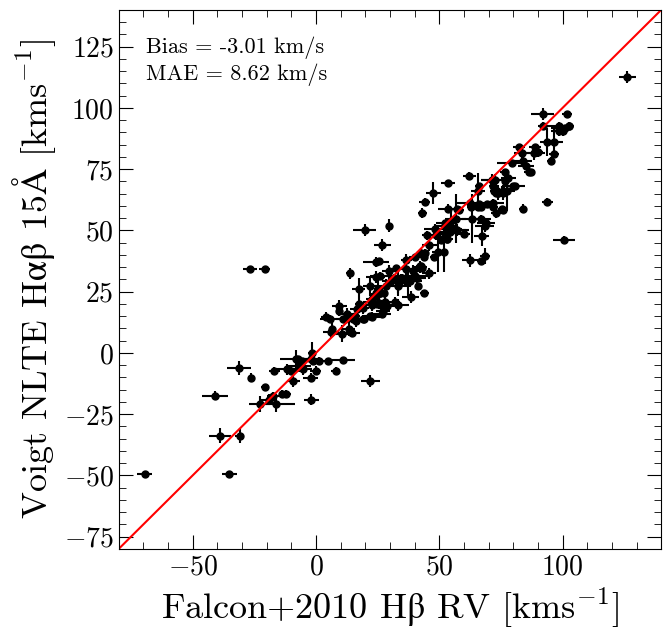

In [12]:
plt.errorbar(table['Hb-V'] - table['LSR-V'], table['nlte_rv'], xerr=table['e_Hb-V'], yerr=table['nlte_e_rv'], fmt='o', c = 'k', zorder=0)
xmin,xmax = -80, 140
plt.plot([xmin, xmax], [xmin,xmax],c='red')
plt.xlim(xmin,xmax)
plt.ylim(xmin,xmax)

plt.text(0.05, 0.95, f'Bias = {np.mean(table['nlte_rv'] - (table['Hb-V'] - table['LSR-V'])):2.2f} km/s', transform=plt.gca().transAxes,
                fontsize=16, verticalalignment='top')
plt.text(0.05, 0.90, f'MAE = {np.mean(np.abs(table['nlte_rv'] - (table['Hb-V'] - table['LSR-V']))):2.2f} km/s', transform=plt.gca().transAxes,
                fontsize=16, verticalalignment='top')
plt.xlabel('Falcon+2010 H$\\beta$ RV $[kms^{-1}]$')
plt.ylabel('Voigt NLTE H$\\alpha\\beta$ $15\\AA$ $[kms^{-1}]$')